In [1]:
import pandas as pd
treino = pd.read_csv('train_3_1.csv')
teste = pd.read_csv('test_3_1.csv')

In [2]:
treino.shape

(1460, 90)

In [3]:
treino.dtypes.value_counts()

int64      37
object     35
float64    18
dtype: int64

In [4]:
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MSZoning_C (all).1', 'MSZoning_FV.1', 'MSZoning_RH.1',
       'MSZoning_RL.1', 'MSZoning_RM.1', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [5]:
treino = treino.loc[:, cols_nr]
treino.shape

(1460, 55)

In [6]:
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 54)

Criação do Modelo

In [7]:
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg_rl = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred_rl = reg_rl.predict(X_test)

In [13]:
from sklearn import tree

In [14]:
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [15]:
y_pred_ad = reg_ad.predict(X_test)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [18]:
y_pred_knn = reg_knn.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23561.238078316037
1538700290.1445236


In [21]:
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27554.765560165975
1996058526.454357


In [22]:
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

34685.060165975105
2884773859.4107885


In [23]:
import matplotlib.pyplot as plt

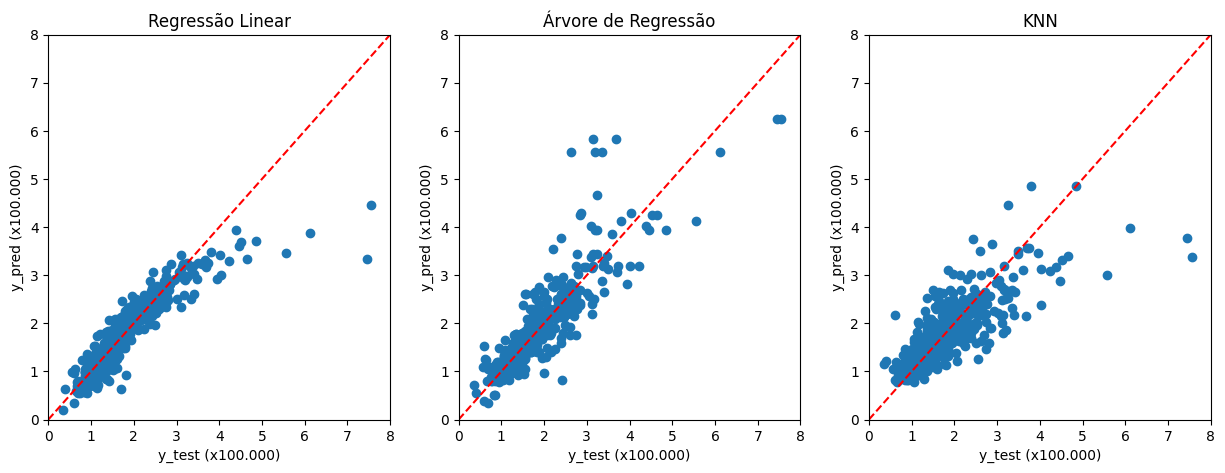

In [24]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

Previsão para a base de teste da competição

In [25]:
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning_C (all).1,MSZoning_FV.1,MSZoning_RH.1,MSZoning_RL.1,MSZoning_RM.1,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
y_pred = reg_rl.predict(teste)

In [27]:
teste['SalePrice'] = y_pred

In [28]:
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,112798.428876
1,1462,133374.647460
2,1463,165821.939500


In [29]:
base_kaggle.to_csv('resultado3_1.csv',index=False)